# 1. Classification of Iris(Multiclass)
- Class가 여러개인 데이터를 Logistic Regression으로 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# 정답인 iris 꽃 종류
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
data, target = iris["data"], iris["target"]

target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 1.2 EDA

In [5]:
# 타겟 데이터 분포
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# 정답 종류별 개수
pd.Series(target).value_counts()

2    50
1    50
0    50
dtype: int64

### 1.3 Data Split

In [7]:
from sklearn.model_selection import train_test_split


train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021)

print("train data 개수:", len(train_data))
print("train data 개수:", len(test_data))

train data 개수: 105
train data 개수: 45


In [8]:
# Train 데이터 정답 개수
pd.Series(train_target).value_counts()

2    38
1    34
0    33
dtype: int64

In [9]:
# Test 데이터 정답 개수
pd.Series(test_target).value_counts()

0    17
1    16
2    12
dtype: int64

In [10]:
# 원본 데이터의 target 분포 반영(startify 함수 사용)
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021, stratify=target)

In [11]:
pd.Series(train_target).value_counts()

2    35
1    35
0    35
dtype: int64

In [12]:
pd.Series(test_target).value_counts()

2    15
1    15
0    15
dtype: int64

# 2. Multiclass
- 시각화를 위해서 Sepal length와 Sepal width만 사용

In [13]:
from sklearn.linear_model import LogisticRegression

X = train_data[:, :2]
X[0]

array([5.1, 3.3])

(1.5, 4.9)

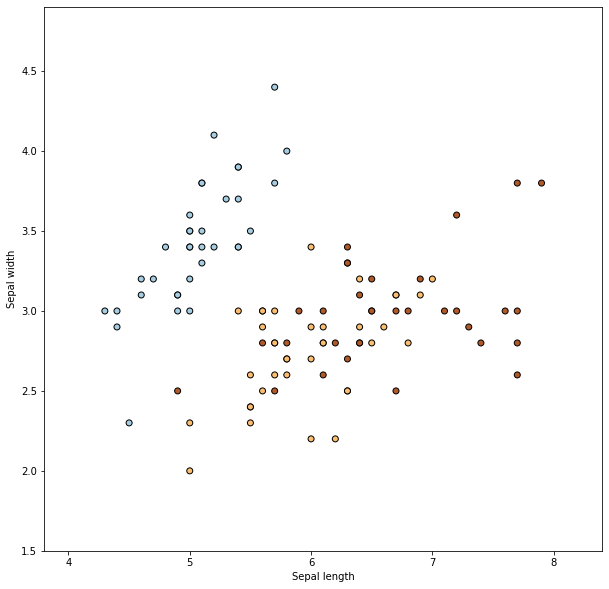

In [14]:
# 시각화
plt.figure(1, figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=train_target, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)

### 2.1 One vs Rest(OVR)

In [15]:
# OVR 방법의 LR 학습
ovr_logit = LogisticRegression(multi_class="ovr")
ovr_logit.fit(X, train_target)

LogisticRegression(multi_class='ovr')

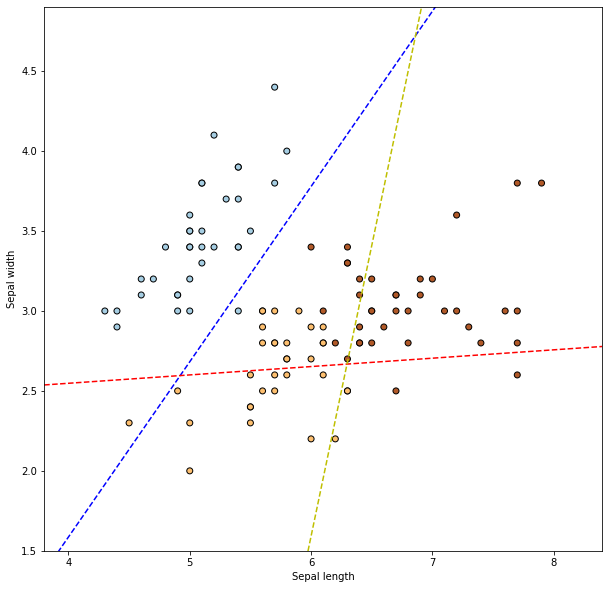

In [16]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

plt.figure(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=ovr_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = ovr_logit.coef_
intercept = ovr_logit.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
             ls="--", color=color)

for i, color in zip(ovr_logit.classes_, "bry"):
    plot_hyperplane(i, color)

### 2.2 Multinomial
- 정답의 분포가 Multinomial 분포를 따른다고 가정한 후 MLR 시행
- LogisticRegression의 기본 값은 "multinomial" 

In [17]:
multi_logit = LogisticRegression(multi_class="multinomial")
multi_logit.fit(X, train_target)

LogisticRegression(multi_class='multinomial')

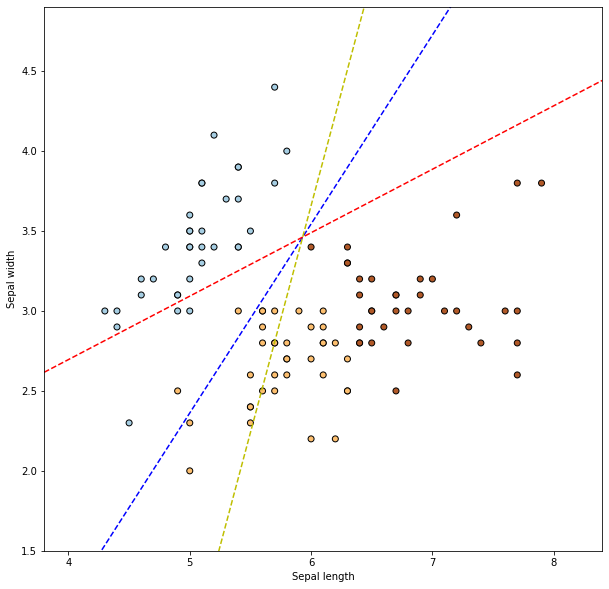

In [18]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

plt.figure(1, figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=multi_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = multi_logit.coef_
intercept = multi_logit.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x_min, x_max], [line(x_min), line(x_max)],
             ls="--", color=color)

for i, color in zip(multi_logit.classes_, "bry"):
    plot_hyperplane(i, color)

# 3. Logistic Regression (Multinomial)

In [19]:
multi_logit = LogisticRegression()

### 3.1 Learning

In [20]:
multi_logit.fit(train_data, train_target)

C:\Users\inp01\Anaconda3\envs\mlflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### 3.2 Predict

In [21]:
train_pred_proba = multi_logit.predict_proba(train_data)

sample_pred = train_pred_proba[0]
sample_pred

array([9.49706085e-01, 5.02925242e-02, 1.39134077e-06])

In [22]:
print(f"class 0에 속하지 않을 확률: {1 - sample_pred[0]:.4f}")
print(f"class 1과 2에 속할 확률: {sample_pred[1:].sum():.4f}")

class 0에 속하지 않을 확률: 0.0503
class 1과 2에 속할 확률: 0.0503


In [23]:
train_pred = multi_logit.predict(train_data)
test_pred = multi_logit.predict(test_data)

### 3.3 Evalution

In [24]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

print(f"Train accuracy is : {train_acc:.2f}")
print(f"Test accuracy is : {test_acc:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.91


# 4. Logistic Regression (OVR)

In [25]:
ovr_logit = LogisticRegression(multi_class="ovr")

### 4.1 Learning

In [26]:
ovr_logit.fit(train_data, train_target)

LogisticRegression(multi_class='ovr')

### 4.2 Predict

In [27]:
ovr_train_pred = ovr_logit.predict(train_data)
ovr_test_pred = ovr_logit.predict(test_data)

### 4.3 Evalution

In [28]:
from sklearn.metrics import accuracy_score

ovr_train_acc = accuracy_score(train_target, ovr_train_pred)
ovr_test_acc = accuracy_score(test_target, ovr_test_pred)

print(f"One vs Rest Train accuracy is : {ovr_train_acc:.2f}")
print(f"One vs Rest Test accuracy is : {ovr_test_acc:.2f}")

One vs Rest Train accuracy is : 0.95
One vs Rest Test accuracy is : 0.93
